## Latar Belakang Background
Transjakarta is the first Bus Rapid Transit(BRT) system in South East Asia which have been operating since 2004.
Transjakarta is designed as mass transportation system to support people activity in Jakarta that knowned for its congested traffic. Transjakata has 243 bus stops in 13 main route corridors operating 24 hours everyday in every corridors.

    
## Problem Statement
Jakarta has a population more than 10 million people as of mid 2021. the Transjakarta mission to reduce the traffic congestion in jakarta seems to not been fully accomplished yet. the company wants to now how to make Transjakarta even more profitable to improving Transjakarta facility getting more better.

As a Data Analyst, i will try to answer the question:

How to increase the profit, so the company can increase Transjakarta facility to make more people use transjakarta and reduce the traffic congestion in Jakarta.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset

There are 6 column in Transjakarta passengers dataset:

- tahun: year of the data is collected.
- bulan: month of the data is collected.
- jenis: type of vehicle.
- kode_trayek: route code.
- trayek: route.
- jumlah_penumpang: the number of passengers.


These are top 5 and top below dataset of Transjakarta Passenger 2021.

In [2]:
df_raw = pd.read_csv('TransJakarta Passengers 2021.csv')
df_raw

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


## Data Understanding and Cleaning
Before analyzing, we need to know first our dataset by doing Data Understanding. In this process, we will know what anomaly inside the dataset and need to be handled by doing Data Cleaning

Let's see is ther any null or duplicate value inside the dataset.

In [3]:
df_raw.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

In [4]:
df_raw[df_raw['trayek'].isnull()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


# Creating Duplicate table to be manipulated so the original data will not be interupted

In [5]:
df_clear = df_raw.copy()
df_clear

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


# Sorting the data by months

In [6]:
df_clear = df_clear.sort_values('bulan')
df_clear

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
549,2021,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135
519,2021,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797
520,2021,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414
521,2021,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994
522,2021,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026
...,...,...,...,...,...,...
823,2021,12,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,0
824,2021,12,Angkutan Umum Integrasi,8E,Bintaro - Blok M,0
825,2021,12,Angkutan Umum Integrasi,8D,Joglo - Blok M,0
812,2021,12,BRT,4,Pulo Gadung 2 - Tosari,319411


# add lost data in trayek column with data from kode_trayek 

In [7]:
df_clear['trayek'][df_clear['kode_trayek']=='JAK.10A'] = 'Gondangdia - Cikini via Salemba Raya'
df_clear['trayek'][df_clear['kode_trayek']=='JAK.10B'] = 'Gondangdia - Cikini via Kramat Raya'

## There will be no missing value data in new data variable

In [8]:
df_clear.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

## There are no Duplicate inside Dataset

In [9]:
df_clear.duplicated().sum()

0

## Removing 2021 data Column because there are only data during 2021 , no need to be included.

In [10]:
df_clear.drop('tahun',axis=1,inplace=True)
df_clear

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026
...,...,...,...,...,...
823,12,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,0
824,12,Angkutan Umum Integrasi,8E,Bintaro - Blok M,0
825,12,Angkutan Umum Integrasi,8D,Joglo - Blok M,0
812,12,BRT,4,Pulo Gadung 2 - Tosari,319411


## adding ticket price data of all kind running transportation in Transjakarta: Mikrotrans, BRT(Busway), Integrated Transportation

Due to lack of information from the dataset, we need to add more information by doing research from the internet and add Price column for all kind transportation in Transjakarta  

In [11]:
df_clear['jenis'].unique()

array(['Mikrotrans', 'Angkutan Umum Integrasi', 'BRT'], dtype=object)

- (Data Riset untuk Harga BRT )https://transjakarta.co.id/produk-dan-layanan/info-tiket/

- (Data Riset untuk Harga Mikrotrans) https://news.detik.com/berita/d-6652665/menjajal-mikrotrans-jak48a-angkot-mewah-gratis-dengan-ac-dan-sliding-door

- (Data Riset untuk Harga Angkutan Umum Integrasi) https://www.cnbcindonesia.com/news/20190612194448-4-77998/jadi-lebih-murah-mana-mrt-atau-lrt#:~:text=Dengan%20demikian%2C%20rerata%20tarif%20yang,kilometer%20mencapai%20Rp%20862%2C06.

By research, people travelling using BRT are charged from Rp2000 to Rp3500. we will taking the average price which is Rp3000 for every passenger for every route. integrated transport are charged from Rp5000 to Rp14000. we will also taking average price which is Rp9500 for every passenger for every route. Mikrotrans are free of charge.

kadiejviavaoevn

In [12]:
conditions = [
    (df_clear['jenis'] == 'Mikrotrans'),
    (df_clear['jenis'] == 'Angkutan Umum Integrasi'),
    (df_clear['jenis'] == 'BRT')
    ]

values = [0,9500,3000]

df_clear['harga'] = np.select(conditions, values)

df_clear.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135,0
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797,0
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,0
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,0
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,0


## create total_pendapatan column, Total income every route

In [13]:
df_clear['total_pendapatan'] = df_clear['jumlah_penumpang'] * df_clear['harga']

df_clear.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga,total_pendapatan
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135,0,0
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797,0,0
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,0,0
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,0,0
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,0,0


## Creating another price column with asumption that Mikrotrans is Rp1000 instead of free.

In [14]:
conditions = [
    (df_clear['jenis'] == 'Mikrotrans'),
    (df_clear['jenis'] == 'Angkutan Umum Integrasi'),
    (df_clear['jenis'] == 'BRT')
    ]

values = [1000,9500,3000]

df_clear['dengan_harga_mikrotrans'] = np.select(conditions, values)

df_clear.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga,total_pendapatan,dengan_harga_mikrotrans
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135,0,0,1000
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797,0,0,1000
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,0,0,1000
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,0,0,1000
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,0,0,1000


## Creating total_pendapatan_dengan_mikrotrans, total income with assumption Mikrotrans is now Rp1000

In [15]:
df_clear['total_pendapatan_dengan_mikrotrans'] = df_clear['jumlah_penumpang'] * df_clear['dengan_harga_mikrotrans']

df_clear.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga,total_pendapatan,dengan_harga_mikrotrans,total_pendapatan_dengan_mikrotrans
549,1,Mikrotrans,JAK.11,Tanah Abang - Kebayoran Lama,72135,0,0,1000,72135000
519,1,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,41797,0,0,1000,41797000
520,1,Mikrotrans,JAK.39,Kalimalang - Duren Sawit,54414,0,0,1000,54414000
521,1,Mikrotrans,JAK.38,Bulak Ringin - Kampung Rambutan,43994,0,0,1000,43994000
522,1,Mikrotrans,JAK.37,Cililitan - Condet via Kayu Manis,46026,0,0,1000,46026000


In [16]:
# Save data bersih dan sudah di tambahkan kolom baru untuk masuk ke aplikasi Tableau
df_clear.to_excel('cleaned data transjakarta 2021.xlsx',index=False)

# Data Analysis
After doing Data Cleaning, next process is doing analysis.

Data analysis is done by trying to how many passenger from every transportion for whole year.

In [17]:
# Menggrup kan supaya tau mana lebih banyak jumlah penumpang dari ketiga jenis
Total_Penumpang_Jenis = df_clear.groupby('jenis')['jumlah_penumpang'].sum()
Total_Penumpang_Jenis

jenis
Angkutan Umum Integrasi    11281390
BRT                        59111356
Mikrotrans                 49915801
Name: jumlah_penumpang, dtype: int64

In [18]:
# Menggrup kan supaya tau mana lebih banyak jumlah penumpang dari ketiga jenis menjadi dataframe
Total_Penumpang_Jenis_DF = df_clear.groupby('jenis')[['jumlah_penumpang']].sum().sort_values('jumlah_penumpang',ascending=False).reset_index()
Total_Penumpang_Jenis_DF

,jenis,jumlah_penumpang
0,BRT,59111356
1,Mikrotrans,49915801
2,Angkutan Umum Integrasi,11281390


## observe which one have the bigger income from all transjakarta kind of transportation

In [19]:
# Dataframe total pendapatan tiap jenis angkutan transjakarta
total_pendapatan = df_clear.groupby('jenis')[['total_pendapatan']].sum().sort_values('total_pendapatan',ascending=False).reset_index()
total_pendapatan

,jenis,total_pendapatan
0,BRT,177334068000
1,Angkutan Umum Integrasi,107173205000
2,Mikrotrans,0


In [20]:
# Dataframe yang berisi total pendapatan jika mikrotrans diasumsikan di ubah harga menjadi Rp 1000
total_pendapatan_dengan_mikro = df_clear.groupby('jenis')[['total_pendapatan_dengan_mikrotrans']].sum().sort_values('total_pendapatan_dengan_mikrotrans',ascending=False).reset_index()
total_pendapatan_dengan_mikro

,jenis,total_pendapatan_dengan_mikrotrans
0,BRT,177334068000
1,Angkutan Umum Integrasi,107173205000
2,Mikrotrans,49915801000


## every kind of transportion has anomaly that jumlah_penumpang(total Passenger) is 0 except for kode_trayek (route code) 1R and 6H which has 176 and 8 passenger for December.

In [21]:
# seleksi dataframe ankutan umum integrasi
df_angkutan_umum = df_clear[df_clear['jenis'] == 'Angkutan Umum Integrasi']

In [22]:
# seleksi untuk menemukan jumlah penumpang yang tidak sama dengan 0 di bulan 12 jenis angkutan umum integrasi
df_angkutan_umum[(df_angkutan_umum['bulan'] == 12)&(df_angkutan_umum['jumlah_penumpang'] != 0)]

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,harga,total_pendapatan,dengan_harga_mikrotrans,total_pendapatan_dengan_mikrotrans
834,12,Angkutan Umum Integrasi,6H,Senen - Lebak Bulus,8,9500,76000,9500,76000
842,12,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,176,9500,1672000,9500,1672000


## Observe how many total passenger(jumlah_penumpang) every month by kind of transportion.

In [23]:
# Grouping untuk melihat jumlah penumpang perbulan
groupOfJenis = df_clear.groupby(['jenis','bulan'])[['jumlah_penumpang']].sum()
groupOfJenis

jumlah_penumpang
jenis                   bulan                  
Angkutan Umum Integrasi 1               1144418
                        2                889506
                        3               1163835
                        4               1168871
                        5               1043163
                        6               1099961
                        7                573188
                        8                725174
                        9                990462
                        10              1128449
                        11              1354179
                        12                  184
BRT                     1               4828190
                        2               4793696
                        3               5948741
                        4               5909231
                        5               5455493
                        6               5419422
                        7               2272391
                        8               2866177
                        9               4368891
                        10              5196358
                        11              5999289
                        12              6053477
Mikrotrans              1               3824758
                        2               3698297
                        3               4482432
                        4               4546512
                        5               4324680
                        6               4527272
                        7               3737526
                        8               2906877
                        9               3172154
                        10              4341452
                        11              5064976
                        12              5288865

## Barplot ranking to see which has bigger passenger

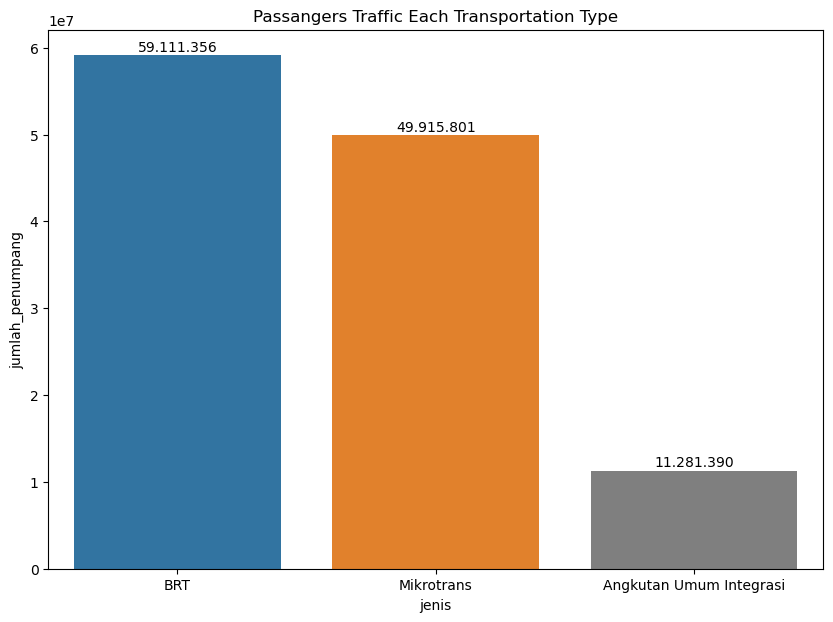

In [24]:
bar_label = ['59.111.356','49.915.801','11.281.390']
plt.figure(figsize=(10,7))
ax = sns.barplot(data=Total_Penumpang_Jenis_DF, x="jenis", y="jumlah_penumpang",errorbar=None, palette = ['tab:blue', 'tab:orange', 'tab:gray'])
plt.title('Passangers Traffic Each Transportation Type')
for i in range(0,3):
    ax.annotate(text=bar_label[i],xy=(i,Total_Penumpang_Jenis_DF['jumlah_penumpang'][i]),ha='center',va='center',textcoords='offset points',xytext=(0,6))

We can see that total passengers during 2021 consisting of:
- Angkutan umum integrasi(Integrated Transport) : 11.281.390 Passengers
- BRT (Busway) : 59.111.359 Passengers
- Mikrotrans : 49.915.801 Passengers

from the graph, we can know that BRT has the most passengers followed by Mikrotrans
 

## Visualizing how many passenger in every month by kind of transportation

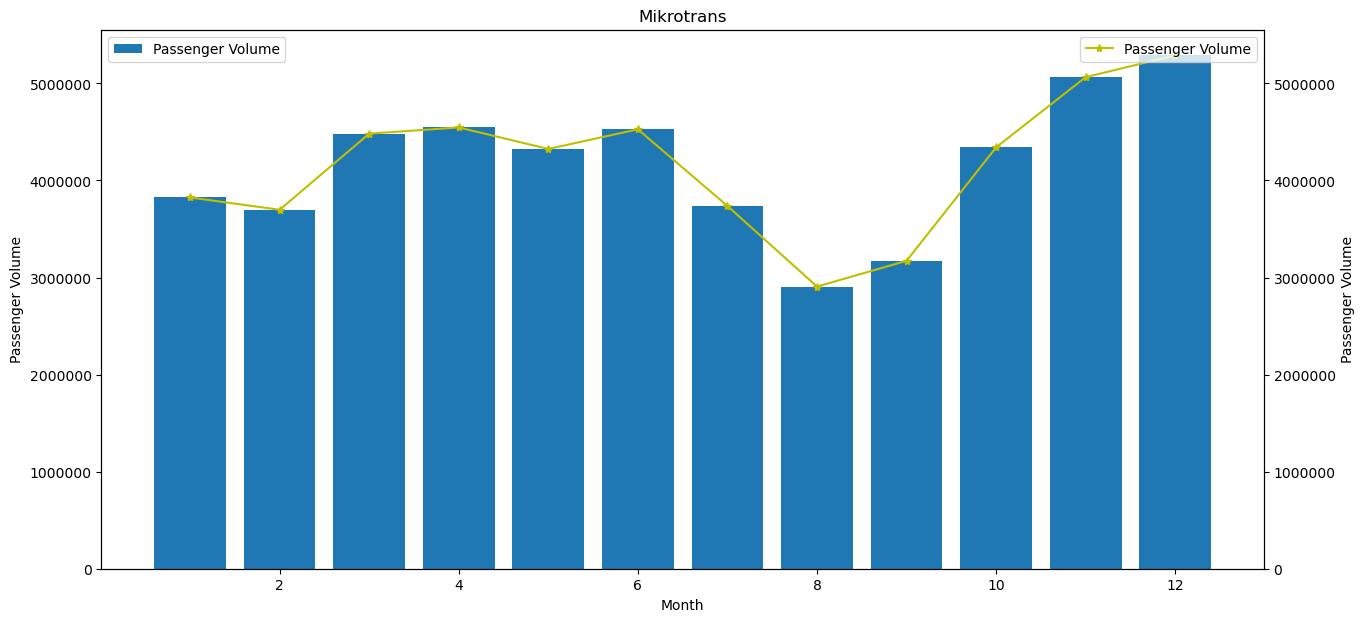

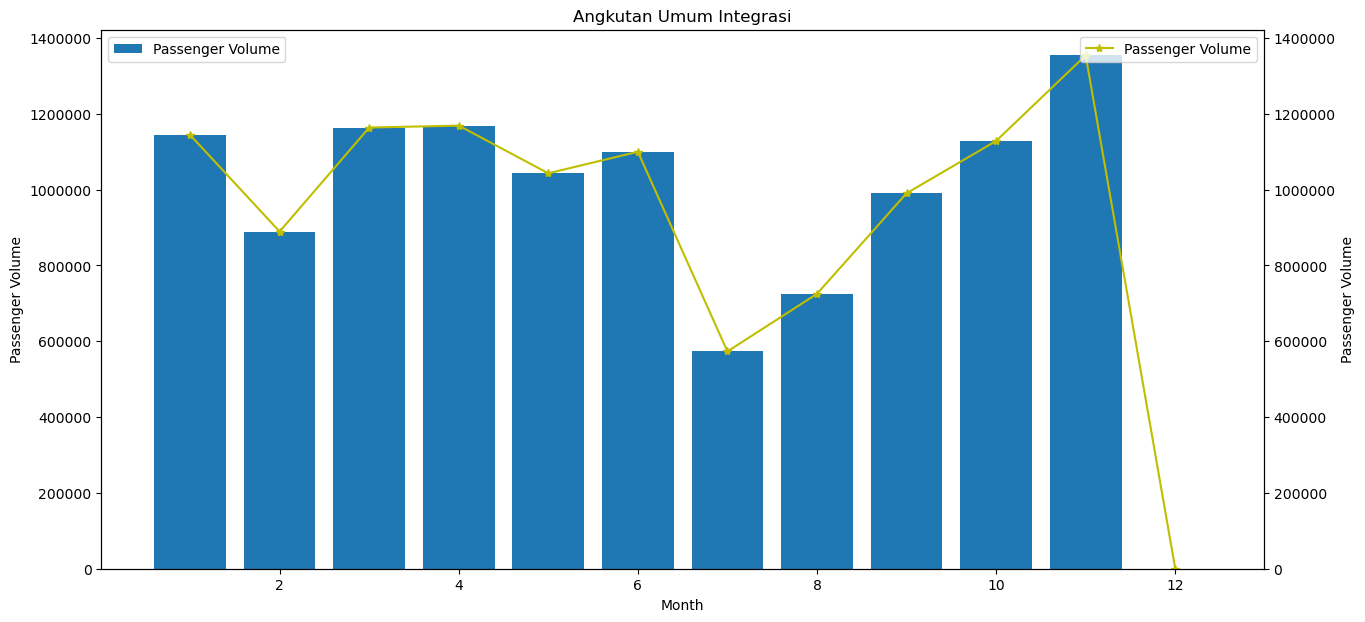

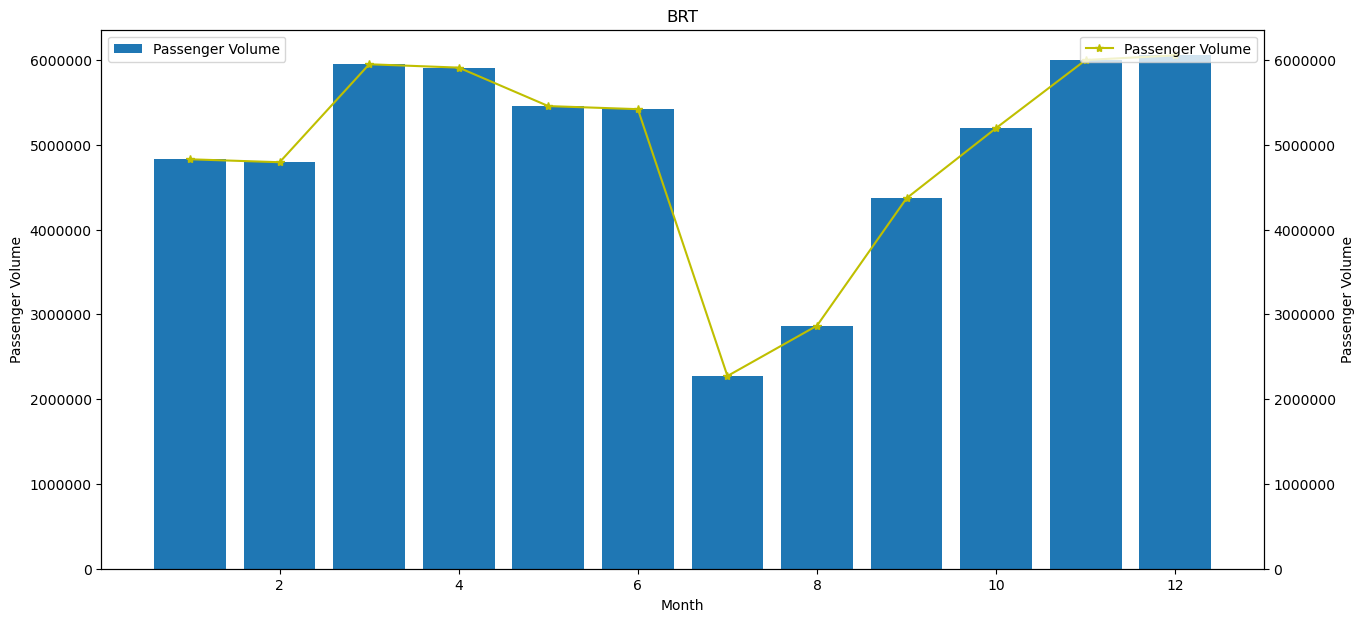

In [25]:
jenis_list = list(df_clear['jenis'].unique())

for jenis in jenis_list:
    data = groupOfJenis.loc[jenis]
    fig, ax = plt.subplots(figsize=(15,7))
    ax2 = ax.twinx()
    
    ax.bar(data.index.get_level_values('bulan'), 
           data['jumlah_penumpang'], 
           label='Passenger Volume')
    
    ax.set_title(jenis)
    ax.set_xlabel('Month')
    ax.set_ylabel('Passenger Volume')
    ax.ticklabel_format(style='plain', axis='y') 

    ax2.plot(data.index.get_level_values('bulan'), 
             data['jumlah_penumpang'], 
             color='y', 
             marker='*', 
             label='Passenger Volume')
    
    ax2.set_ylabel('Passenger Volume')
    ax2.set_ylim(0, ax.get_ylim()[1])
    ax2.ticklabel_format(style='plain', axis='y') 
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

By visualization above, we can see that every kind of transportation has many passanger traffic every month. there are anomaly in after month 6, there are decline in traffic but returning to incline in the next month.

We can know also for integrated transport, there are another anomaly that in month 12 there are steep decline where there are only 200 passenger during that month.

## Creating visualization which route has the highest and lowest passenger volume

In [26]:
# Grouping data untuk mencari jumlah penumpang tiap trayek 5 teratas dan 5 terbawah
grouped = df_clear.groupby('trayek')['jumlah_penumpang'].sum().reset_index()
sorted_grouped = grouped.sort_values('jumlah_penumpang', ascending=False)
sorted_grouped_bottom = grouped.sort_values('jumlah_penumpang', ascending=True)
sorted_grouped

,trayek,jumlah_penumpang
5,Blok M - Kota,10079752
75,Pinang Ranti - Pluit,7694406
34,Kalideres - Pasar Baru,5250726
59,Lebak Bulus - Harmoni,5122397
37,Kampung Melayu - Ancol,4902814
...,...,...
89,Ragunan - Departemen Pertanian,1386
17,Dukuh Atas - Casablanca via Epicentrum Raya,608
108,Stasiun Manggarai - Ragunan,377
54,Kota Tua Explorer,376


In [27]:
sorted_grouped_bottom

,trayek,jumlah_penumpang
114,Taman Kota Intan - Museum Bahari,232
54,Kota Tua Explorer,376
108,Stasiun Manggarai - Ragunan,377
17,Dukuh Atas - Casablanca via Epicentrum Raya,608
89,Ragunan - Departemen Pertanian,1386
...,...,...
37,Kampung Melayu - Ancol,4902814
59,Lebak Bulus - Harmoni,5122397
34,Kalideres - Pasar Baru,5250726
75,Pinang Ranti - Pluit,7694406


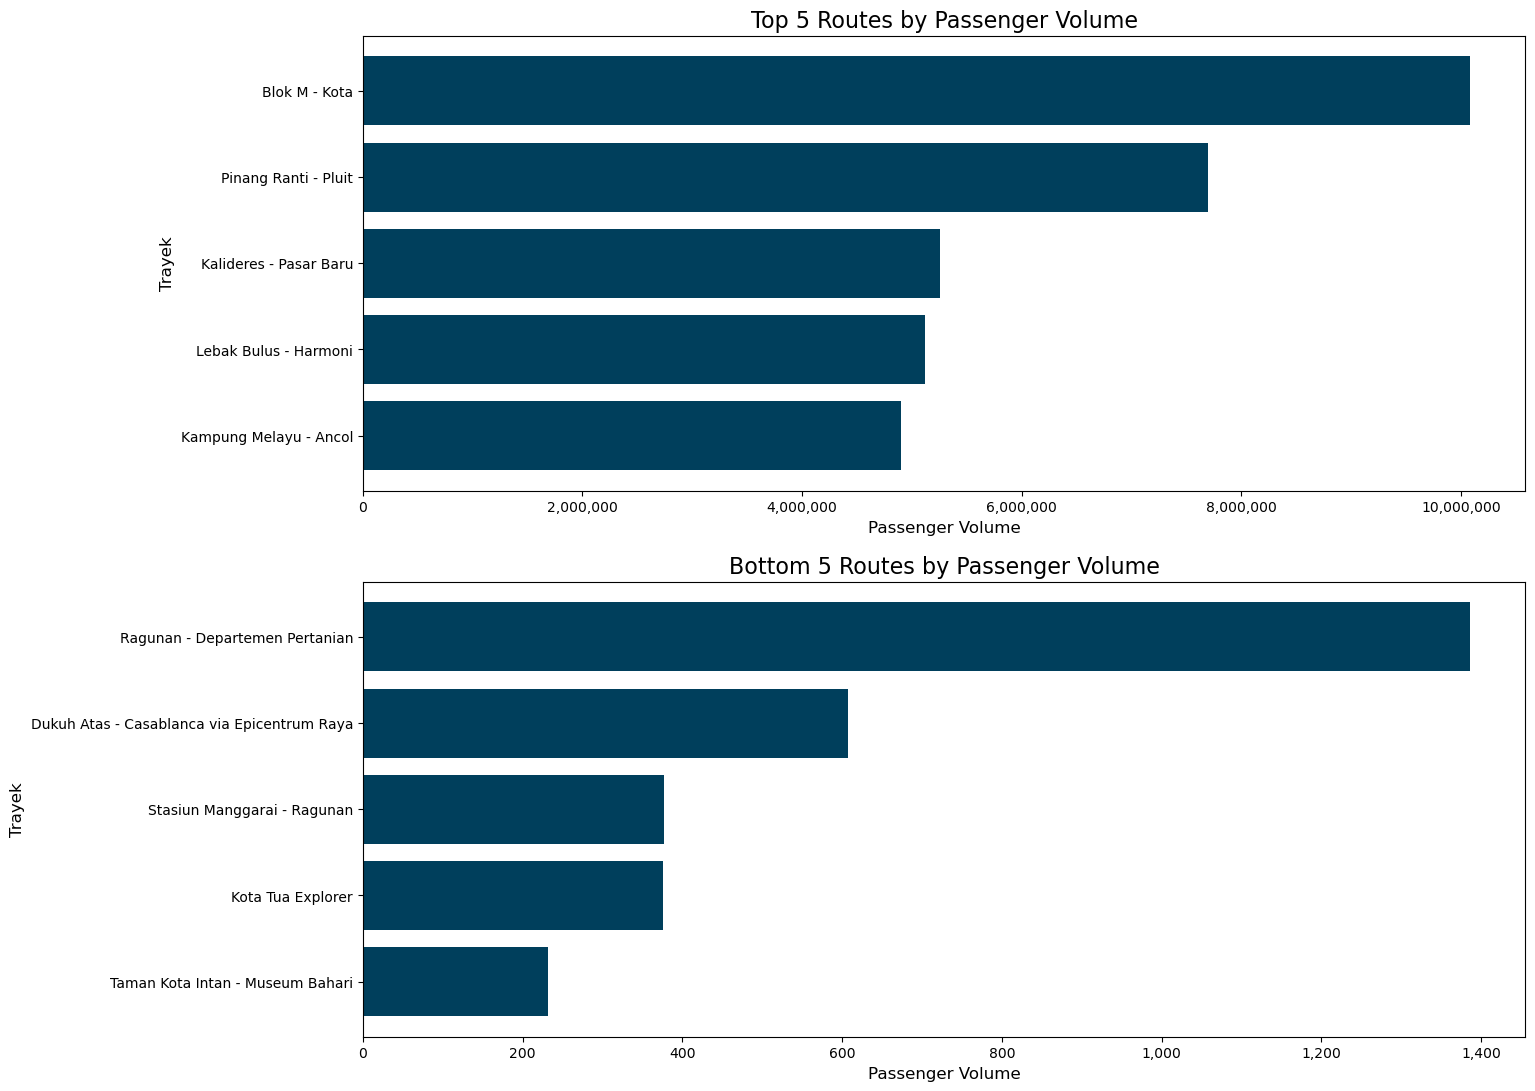

In [28]:
# Visualisasi untuk 5 trayek dengan jumlah penumpang terbanyak dan 5 trayek dengan jumlah penumpang paling sedikit
top_routes = sorted_grouped.head().sort_values('jumlah_penumpang')
bottom_routes = sorted_grouped_bottom.head().sort_values('jumlah_penumpang')

fig, ax = plt.subplots(2,1,figsize=(15, 13))
ax[0].barh(top_routes['trayek'], top_routes['jumlah_penumpang'], color='#003f5c')

ax[0].set_title('Top 5 Routes by Passenger Volume', fontsize=16)
ax[0].set_xlabel('Passenger Volume', fontsize=12)
ax[0].set_ylabel('Trayek', fontsize=12)
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax[1].barh(bottom_routes['trayek'], bottom_routes['jumlah_penumpang'], color='#003f5c')

ax[1].set_title('Bottom 5 Routes by Passenger Volume', fontsize=16)
ax[1].set_xlabel('Passenger Volume', fontsize=12)
ax[1].set_ylabel('Trayek', fontsize=12)
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


From the graph above, we can know that:
- Blok M - Kota has reached 10.079.052 passenger, bus stops along the route will be very busy. Followed by Pinang Ranti - Pluit which has reached 7,694,406 passenger for whole year.
- we can see that there also route with very low passenger volume. Taman Kota Intan - Museum Bahari has only 232 passenger, second lowest followed by Kota Tua Explorer Route with 376 passenger for whole year.

## Barplot to show comparison total_pendapatan(total income) between free of charge and Rp1000 Mikrotrans

Text(0.5, 1.0, 'Mikrotrans Assumsption with price (Rp 1000)')

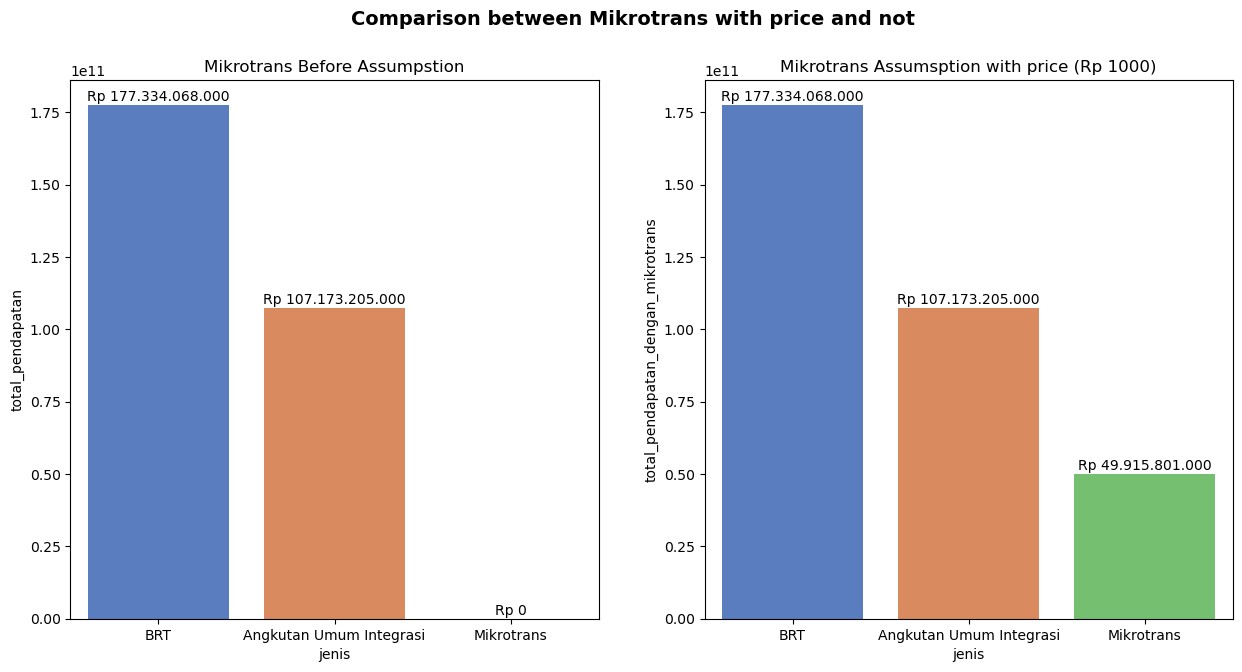

In [29]:
bar_total = ['Rp 177.334.068.000','Rp 107.173.205.000','Rp 0']
bar_total_mikro = ['Rp 177.334.068.000','Rp 107.173.205.000','Rp 49.915.801.000']
figure, axes = plt.subplots(1, 2,  figsize=(15,7))
figure.suptitle('Comparison between Mikrotrans with price and not', size=14, fontweight='bold')
sns.barplot(x='jenis', 
            y='total_pendapatan', 
            data=total_pendapatan, 
            palette='muted',
            ax=axes[0])
for i in range(0,3):
    axes[0].annotate(text=bar_total[i],xy=(i,total_pendapatan['total_pendapatan'][i]),ha='center',va='center',textcoords='offset points',xytext=(0,6))            
axes[0].set_title('Mikrotrans Before Assumpstion')

sns.barplot(x='jenis', 
            y='total_pendapatan_dengan_mikrotrans', 
            data=total_pendapatan_dengan_mikro,
            palette='muted',
            ax=axes[1])
for i in range(0,3):
    axes[1].annotate(text=bar_total_mikro[i],xy=(i,total_pendapatan_dengan_mikro['total_pendapatan_dengan_mikrotrans'][i]),ha='center',va='center',textcoords='offset points',xytext=(0,6))
axes[1].set_title('Mikrotrans Assumsption with price (Rp 1000)')

Graph above were comparison between Mikrotrans with price and not.
we can see that by charging Rp1000 for Mikrotrans, company can get Rp49 billion income every year.

# Conclusion and Recomendation

From the analysis, we can conclude:
- Transjakarta passenger can reach 4 million people every month, which has 200.000 passenger every day (20 Work days)
- Total Passenger for whole year, BRT has 59,111,356 passenger, Mikrotrans has 49,915,801 passenger, Integrated Transport has 11.281.390 passenger.
- Total income for whole year, BRT has 177 billion rupiah, Mikrotrans has 0 rupiah, Integrated transport has 107 billion rupiah.
- Busiest Route is BRT came from Central Jakarta 


**Recomendation**

According to data and analysis:
- i recommend to increase revenue to improve Transjakarta facility, by charging Mikrotrans passenger into Rp1000 or even Rp2000. another option is to increase BRT ticket price into Rp5000 flat, because both transportation has many passangger by only 10 million people margin.

- by increasing the price tag, we can add more fleet and renovating bus stops. with more fleet, congestivity rate will reduced and passanger can get more comfortable using transjakarta.

- allocating some of the fleet with low volume into more higher volume are also needed.

By increasing the price tag, we can hope that more middle upper class people will use Transjakarta  because of its comfortability and affordability. If this plans works, it will reduce traffic and air Pollution in Jakarta.